In [82]:
import pandas as pd
from keybert import KeyBERT
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer, HashingVectorizer


In [2]:
!pip3 install keybert

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 86.0/86.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 238.7/238.7 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB ? eta 0:00:00
     ---------------------------------------- 6.8/6.8 MB 15.4 MB/s eta 0:00:00
     ------------------------------------- 172.3/172.3 MB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 12.7 MB/s eta 0:00:00
     ------------------------------------- 977.8/977.8 kB 12.4 MB/s eta 0:00:00
     -------------------------------------- 200.1/200.1 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 6.5/6.5 MB 11.8 MB/s eta 0:00:00
     ---

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords('''Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal).
         A supervised learning algorithm analyzes the training data and produces an inferred function,
         which can be used for mapping new examples. An optimal scenario will allow for the
         algorithm to correctly determine the class labels for unseen instances. This requires
         the learning algorithm to generalize from the training data to unseen situations in a
         'reasonable' way (see inductive bias).
''', keyphrase_ngram_range=(1, 3))


In [7]:
%%time
keywords = kw_model.extract_keywords('''Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal).
         A supervised learning algorithm analyzes the training data and produces an inferred function,
         which can be used for mapping new examples. An optimal scenario will allow for the
         algorithm to correctly determine the class labels for unseen instances. This requires
         the learning algorithm to generalize from the training data to unseen situations in a
         'reasonable' way (see inductive bias).
''', keyphrase_ngram_range=(1, 3))

CPU times: total: 2.5 s
Wall time: 323 ms


In [20]:
complaints = pd.read_csv("./complaints/complaints.csv").dropna().head(3000)

C:\Users\USER_ELISEY\AppData\Local\Temp\ipykernel_18704\3186319543.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv("./complaints/complaints.csv").dropna().head(3000)


In [24]:
complaints = complaints.rename(columns={"Consumer complaint narrative": "narrative"})

In [26]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)


INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [30]:
def f(text):
    from keybert import KeyBERT
    return [i[0] for i in KeyBERT().extract_keywords(text, keyphrase_ngram_range=(1, 3))]

In [31]:
f(complaints.iloc[0].narrative)

['termination fees rent',
 'given notice vacate',
 'early termination fees',
 'termination fees',
 'notice vacate']

In [34]:
complaints["narrative_keyngrams"] = complaints["narrative"].parallel_apply(f)

In [35]:
complaints.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_keyngrams
6880,2016-02-16,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,I was given a notice to vacate XX/XX/2015. I p...,Company believes the complaint is the result o...,"HW Holding, Inc",FL,34711.0,Servicemember,Consent provided,Web,2016-02-19,Closed with explanation,Yes,No,1788003,"[termination fees rent, given notice vacate, e..."
6931,2015-11-08,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,I called this Revenue Recovery to ask for an i...,Company chooses not to provide a public response,Revenue Recovery Corporation,KY,40272.0,Servicemember,Consent provided,Web,2015-11-08,Closed with explanation,Yes,No,1645453,"[collections account credit, credit report col..."
7086,2016-10-26,Debt collection,Payday loan,Improper contact or sharing of info,Contacted me after I asked not to,Company called Premier Portfolio Group continu...,Company believes it acted appropriately as aut...,Premier Portfolio Group,SD,57702.0,Servicemember,Consent provided,Web,2016-10-28,Closed with explanation,Yes,No,2180605,"[phone numbers company, numbers company calls,..."
7107,2016-10-28,Debt collection,I do not know,Taking/threatening an illegal action,Sued where didn't live/sign for debt,The firm of Pressler & Pressler has filed a le...,Company believes it acted appropriately as aut...,"Pressler & Pressler, LLP",NJ,7726.0,Servicemember,Consent provided,Web,2016-10-28,Closed with explanation,Yes,No,2183670,"[bank contacting pressler, contacted claimed d..."
7125,2016-02-04,Debt collection,Credit card,Taking/threatening an illegal action,Attempted to/Collected exempt funds,I became behind on my Military Star Card when ...,Company believes it acted appropriately as aut...,Army and Air Force Exchange Service,VA,22554.0,Servicemember,Consent provided,Web,2016-02-04,Closed with explanation,Yes,Yes,1774097,"[told filing hardship, filing hardship, bills ..."


In [44]:
all_ngrams = []
complaints["narrative_keyngrams"].apply(lambda x: all_ngrams.extend(x))
#set(all_ngrams)

6880       None
6931       None
7086       None
7107       None
7125       None
           ... 
3249401    None
3249707    None
3250032    None
3250183    None
3250394    None
Name: narrative_keyngrams, Length: 3000, dtype: object

In [ ]:
sns.heatmap(complaints, x="")

In [48]:
import plotly.express as px

In [47]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [61]:
dtm = tfidf.fit_transform(complaints['narrative_keyngrams'].apply(lambda x: " ".join(x)))

In [67]:
dtm

<3000x1542 sparse matrix of type '<class 'numpy.float64'>'
	with 22285 stored elements in Compressed Sparse Row format>

In [72]:
bow = CountVectorizer()
bow_vectors = bow.fit_transform(complaints['narrative_keyngrams'].apply(lambda x: " ".join(x)))

In [71]:
bow_vectors

<3000x3047 sparse matrix of type '<class 'numpy.int64'>'
	with 23790 stored elements in Compressed Sparse Row format>

In [85]:
hash_vectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False)
hash_vectorizer.fit(complaints['narrative_keyngrams'].apply(lambda x: " ".join(x)))

HashingVectorizer(alternate_sign=False, n_features=10000, norm=None)

In [86]:
hash_vectors = hash_vectorizer.transform(complaints['narrative_keyngrams'].apply(lambda x: " ".join(x)))

In [87]:
hash_vectors

<3000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 23787 stored elements in Compressed Sparse Row format>

In [91]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
from operator import itemgetter


texts = complaints['narrative_keyngrams'].apply(lambda x: " ".join(x))
dataset = complaints["narrative_keyngrams"]

dictionary = Dictionary(dataset)


dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)


corpus = [dictionary.doc2bow(text) for text in dataset]


topic_nums = list(np.arange(5, 10, 1))

coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics)


C:\Users\USER_ELISEY\AppData\Roaming\Python\Python310\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning:

divide by zero encountered in scalar divide

C:\Users\USER_ELISEY\AppData\Roaming\Python\Python310\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning:

invalid value encountered in scalar divide



5


In [92]:
# As we can see: 5 topics

In [113]:
# from sklearn.decomposition import NMF
# nmf_model = NMF(n_components=5, random_state=40)
# nmf_model.fit(hash_vectors)

# # View the number of features
# len(bow.get_feature_names_out())

3047

In [129]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5, random_state=40)
nmf_model.fit(dtm)

# View the number of features
len(tfidf.get_feature_names_out())

1542

In [130]:
single_topic = nmf_model.components_[0]
single_topic.argsort()
top_word_indices = single_topic.argsort()[-10:]
for index in top_word_indices:
    print(tfidf.get_feature_names_out()[index])


disputed
dispute
alleged
validation
owed
verification
owe
xxxx
collector
debt


In [131]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')


THE TOP 15 WORDS FOR TOPIC #0
['company', 'letter', 'received', 'paid', 'collect', 'disputed', 'dispute', 'alleged', 'validation', 'owed', 'verification', 'owe', 'xxxx', 'collector', 'debt']


THE TOP 15 WORDS FOR TOPIC #1
['medical', 'collect', 'sent', 'called', 'letter', 'account', 'owed', 'collections', 'received', 'bureau', 'contacted', 'agencies', 'notice', 'agency', 'collection']


THE TOP 15 WORDS FOR TOPIC #2
['services', 'disputed', 'company', 'bureau', 'owe', 'remove', 'reports', 'reported', 'bureaus', 'collections', 'xxxx', 'reporting', 'removed', 'report', 'credit']


THE TOP 15 WORDS FOR TOPIC #3
['loan', 'called', 'debts', 'robo', 'received', 'owe', 'harassment', 'xxxx', 'company', 'harassing', 'stop', 'number', 'calling', 'phone', 'calls']


THE TOP 15 WORDS FOR TOPIC #4
['remove', 'owe', 'disputed', 'accounts', 'collections', 'inquiry', 'unauthorized', 'victim', 'loan', 'fraud', 'xxxx', 'theft', 'identity', 'fraudulent', 'account']




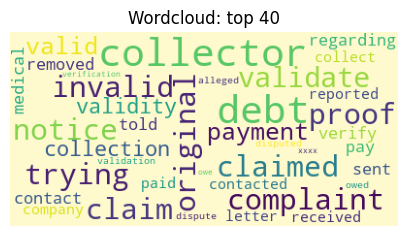

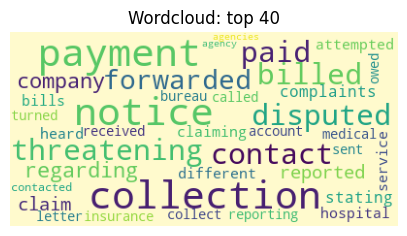

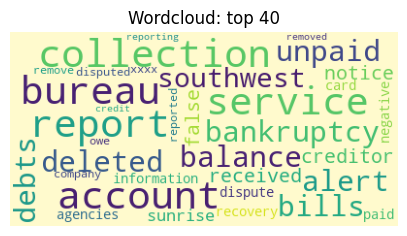

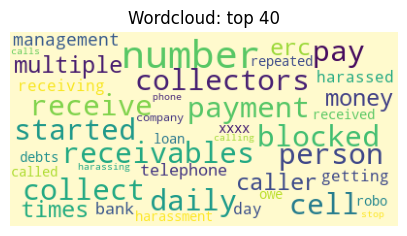

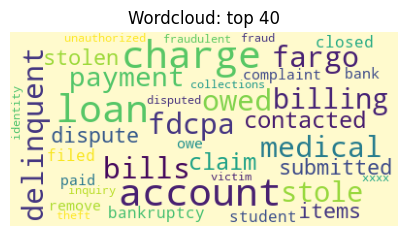

In [145]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
for index,topic in enumerate(nmf_model.components_):
    
    wordcloud = WordCloud(
                              background_color='lemonchiffon',
                              stopwords=stopwords,
                              max_words=40,
                              max_font_size=40, 
                              random_state=42
                             ).generate(" ".join([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-40:]]))

    fig = plt.figure(figsize=(5, 5))
    plt.title("Wordcloud: top 40")
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


In [100]:
topic_results = nmf_model.transform(dtm)
topic_results[0].round(2)
topic_results[0].argmax()
topic_results.argmax(axis=1)


array([1, 2, 3, ..., 3, 0, 4], dtype=int64)

In [101]:
complaints['Topic'] = topic_results.argmax(axis=1)

In [102]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_keyngrams,Topic
6880,2016-02-16,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,I was given a notice to vacate XX/XX/2015. I p...,Company believes the complaint is the result o...,"HW Holding, Inc",FL,34711.0,Servicemember,Consent provided,Web,2016-02-19,Closed with explanation,Yes,No,1788003,"[termination fees rent, given notice vacate, e...",1
6931,2015-11-08,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,I called this Revenue Recovery to ask for an i...,Company chooses not to provide a public response,Revenue Recovery Corporation,KY,40272.0,Servicemember,Consent provided,Web,2015-11-08,Closed with explanation,Yes,No,1645453,"[collections account credit, credit report col...",2
7086,2016-10-26,Debt collection,Payday loan,Improper contact or sharing of info,Contacted me after I asked not to,Company called Premier Portfolio Group continu...,Company believes it acted appropriately as aut...,Premier Portfolio Group,SD,57702.0,Servicemember,Consent provided,Web,2016-10-28,Closed with explanation,Yes,No,2180605,"[phone numbers company, numbers company calls,...",3
7107,2016-10-28,Debt collection,I do not know,Taking/threatening an illegal action,Sued where didn't live/sign for debt,The firm of Pressler & Pressler has filed a le...,Company believes it acted appropriately as aut...,"Pressler & Pressler, LLP",NJ,7726.0,Servicemember,Consent provided,Web,2016-10-28,Closed with explanation,Yes,No,2183670,"[bank contacting pressler, contacted claimed d...",0
7125,2016-02-04,Debt collection,Credit card,Taking/threatening an illegal action,Attempted to/Collected exempt funds,I became behind on my Military Star Card when ...,Company believes it acted appropriately as aut...,Army and Air Force Exchange Service,VA,22554.0,Servicemember,Consent provided,Web,2016-02-04,Closed with explanation,Yes,Yes,1774097,"[told filing hardship, filing hardship, bills ...",0


In [114]:
topic_presenter = complaints.groupby('Topic').head(5)
topic_presenter.sort_values('Topic')


,Date received,Product,Sub-product,Issue,Sub-issue,narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_keyngrams,Topic
7107,2016-10-28,Debt collection,I do not know,Taking/threatening an illegal action,Sued where didn't live/sign for debt,The firm of Pressler & Pressler has filed a le...,Company believes it acted appropriately as aut...,"Pressler & Pressler, LLP",NJ,7726.0,Servicemember,Consent provided,Web,2016-10-28,Closed with explanation,Yes,No,2183670,"[bank contacting pressler, contacted claimed d...",0
7125,2016-02-04,Debt collection,Credit card,Taking/threatening an illegal action,Attempted to/Collected exempt funds,I became behind on my Military Star Card when ...,Company believes it acted appropriately as aut...,Army and Air Force Exchange Service,VA,22554.0,Servicemember,Consent provided,Web,2016-02-04,Closed with explanation,Yes,Yes,1774097,"[told filing hardship, filing hardship, bills ...",0
7135,2015-06-30,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,I received a false statement saying that my re...,Company believes it acted appropriately as aut...,"Phillips & Cohen Associates, Ltd.",MI,48170.0,"Older American, Servicemember",Consent provided,Web,2015-06-30,Closed with non-monetary relief,Yes,No,1445163,"[deceased husband owed, debt husband owed, hus...",0
7483,2016-01-13,Debt collection,Credit card,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,I went to the offices of Foster & Garbus who a...,Company believes it acted appropriately as aut...,Forster & Garbus LLP,NY,10037.0,Servicemember,Consent provided,Web,2016-01-13,Closed with explanation,Yes,No,1740742,"[settlement agreement nullified, payment instr...",0
7557,2015-09-25,Debt collection,"Other (i.e. phone, health club, etc.)",False statements or representation,Attempted to collect wrong amount,This company sent a letter collecting a debt f...,Company believes it acted appropriately as aut...,ERC,VA,20171.0,Servicemember,Consent provided,Web,2015-09-25,Closed with non-monetary relief,Yes,No,1579819,"[debt xxxx account, letter collecting debt, co...",0
6880,2016-02-16,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,I was given a notice to vacate XX/XX/2015. I p...,Company believes the complaint is the result o...,"HW Holding, Inc",FL,34711.0,Servicemember,Consent provided,Web,2016-02-19,Closed with explanation,Yes,No,1788003,"[termination fees rent, given notice vacate, e...",1
9745,2015-09-17,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,I submitted a 30 day notice for moving out of ...,Company believes complaint caused principally ...,"Aargon Agency, Inc.",FL,33898.0,Servicemember,Consent provided,Web,2015-09-21,Closed,Yes,No,1568560,"[notice rent check, written notice apartment, ...",1
7982,2016-10-23,Debt collection,Medical,Improper contact or sharing of info,Talked to a third party about my debt,In XX/XX/XXXX of this year XXXX and my husband...,Company believes it acted appropriately as aut...,TENET HEALTHCARE CORPORATION,TX,79936.0,Servicemember,Consent provided,Web,2016-10-25,Closed with explanation,Yes,No,2174266,"[claimed owed debt, texas statute limitations,...",1
9992,2016-04-04,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,I have been contacted by USAA seven times toda...,Company believes it acted appropriately as aut...,UNITED SERVICES AUTOMOBILE ASSOCIATION,MN,55040.0,Servicemember,Consent provided,Web,2016-04-04,Closed with explanation,Yes,Yes,1862719,"[contacted usaa, letter request usaa, usaa col...",1
8305,2016-09-20,Debt collection,Payday loan,False statements or representation,Impersonated an attorney or official,APG and associates collection agency continues...,

In [117]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 5
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=42)

In [124]:
model.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [125]:
topic_dict = {}
feature_names = tfidf.get_feature_names_out()
no_top_words = 10
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                    for i in topic.argsort()[:-no_top_words - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                    for i in topic.argsort()[:-no_top_words - 1:-1]]
pd.DataFrame(topic_dict)


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,credit,73.5,loan,34.4,debt,56.0,debt,51.0,debt,126.5
1,collection,59.8,calls,22.8,fraudulent,46.2,collection,50.5,collector,43.1
2,debt,52.2,complaint,20.9,credit,36.5,agency,35.9,xxxx,41.4
3,agency,47.6,loans,17.0,account,34.2,owed,29.7,credit,27.7
4,report,41.7,student,15.4,disputed,33.7,owe,29.4,collection,25.2
5,calling,37.0,credit,14.1,theft,30.8,xxxx,24.8,insurance,24.6
6,calls,33.7,federal,12.7,identity,29.6,garnishment,23.7,owe,22.0
7,xxxx,29.6,hospital,12.5,bankruptcy,26.7,received,18.7,medical,19.4
8,phone,29.1,collections,12.2,xxxx,25.5,garnished,17.6,debts,17.6
9,removed,28.8,pay,11.3,dispute,23.8,notice,17.5,paid,17.2


In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [83]:
# LEGACY

In [81]:
from transformers import AutoTokenizer, pipeline, TFRobertaModel
import numpy as np
from transformers import AutoTokenizer, pipeline, TFDistilBertModel
from scipy.spatial.distance import cosine
def transformer_embedding(name,inp,model_name):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features


roberta_features1 = transformer_embedding('roberta-base', complaints['narrative_keyngrams'].apply(lambda x: " ".join(x)), TFRobertaModel)

ImportError: 
TFRobertaModel requires the TensorFlow library but it was not found in your environment.
However, we were able to find a PyTorch installation. PyTorch classes do not begin
with "TF", but are otherwise identically named to our TF classes.
If you want to use PyTorch, please use those classes instead!

If you really do want to use TensorFlow, please follow the instructions on the
installation page https://www.tensorflow.org/install that match your environment.
